In [2]:
# Preliminaries (https://github.com/deeplizard/Keras_Jupyter_Notebooks/blob/master/CNN.ipynb)

import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
% matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Create variables for path
train_path = 'data/train/'
valid_path = 'data/valid'

In [4]:
# Create batches
# Strongly consider setting up an alias for ImageDataGenerator with better presets
train_batch = ImageDataGenerator().flow_from_directory(train_path, target_size = (256, 256), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 32)
valid_batch = ImageDataGenerator().flow_from_directory(valid_path, target_size = (256, 256), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 8)

Found 417 images belonging to 4 classes.
Found 63 images belonging to 4 classes.


In [5]:
imgs, labels = next(train_batch) # randomly select batch_size images

In [6]:
# plots 10 images with labels
def plots(ims, figsize=(12, 6), rows = 2, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

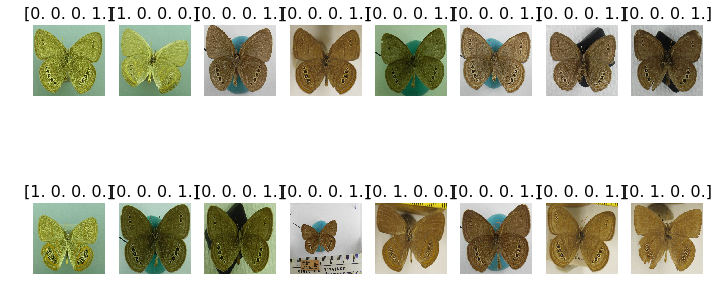

In [7]:
plots(imgs, titles = labels)

In [26]:
# Now to model
model = Sequential([
        Conv2D(16, (9, 9), activation='relu', input_shape = (256, 256, 3)),
        Conv2D(8, (3, 3), activation='relu', input_shape = (256, 256, 3)),
        Flatten(),
        Dense(4, activation='softmax'),
    ])

In [27]:
model.compile(Adam(lr = .0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 248, 248, 16)      3904      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 246, 246, 8)       1160      
_________________________________________________________________
flatten_6 (Flatten)          (None, 484128)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1936516   
Total params: 1,941,580
Trainable params: 1,941,580
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit_generator(train_batch, steps_per_epoch = 13, 
                    validation_data = valid_batch, validation_steps = 8, epochs = 5, verbose = 2)

Epoch 1/5
 - 38s - loss: 8.4050 - acc: 0.4760 - val_loss: 10.5775 - val_acc: 0.3438
Epoch 2/5
 - 31s - loss: 7.8585 - acc: 0.5124 - val_loss: 10.5775 - val_acc: 0.3438
Epoch 3/5
 - 34s - loss: 7.4025 - acc: 0.5407 - val_loss: 10.5775 - val_acc: 0.3438
Epoch 4/5
 - 33s - loss: 7.6716 - acc: 0.5240 - val_loss: 10.5775 - val_acc: 0.3438
Epoch 5/5
 - 36s - loss: 8.1365 - acc: 0.4952 - val_loss: 10.5775 - val_acc: 0.3438
